Found 4068 images belonging to 5 classes.
Found 4068 images belonging to 5 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 70s 537ms/step - accuracy: 0.4966 - loss: 1.1516 - val_accuracy: 0.9007 - val_loss: 0.2575
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 106s 826ms/step - accuracy: 0.8808 - loss: 0.3327 - val_accuracy: 0.9570 - val_loss: 0.1366
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 82s 640ms/step - accuracy: 0.9530 - loss: 0.1423 - val_accuracy: 0.8670 - val_loss: 0.4182
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 74s 565ms/step - accuracy: 0.9628 - loss: 0.1121 - val_accuracy: 0.9312 - val_loss: 0.2090
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 76s 588ms/step - accuracy: 0.9600 - loss: 0.1186 - val_accuracy: 0.8503 - val_loss: 0.4285
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 64s 502ms/step - accuracy: 0.9664 - loss: 0.0935 - val_accuracy: 0.8884 - val_loss: 0.3141
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 101s 789ms/step - accuracy: 0.9732 - loss: 0.0805 - val_accuracy: 0.9019 - val_loss: 0.3127
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 71s 555ms/step - accuracy: 0.9794 - loss:

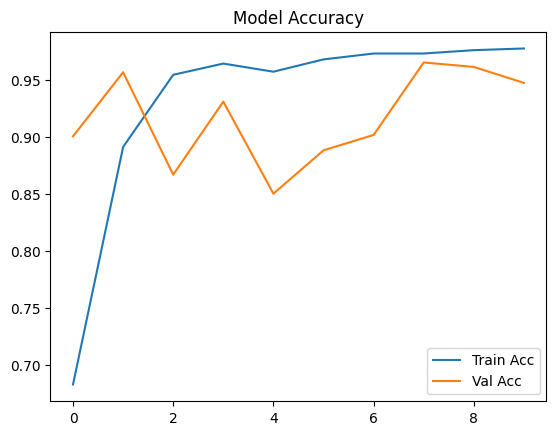

128/128 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step


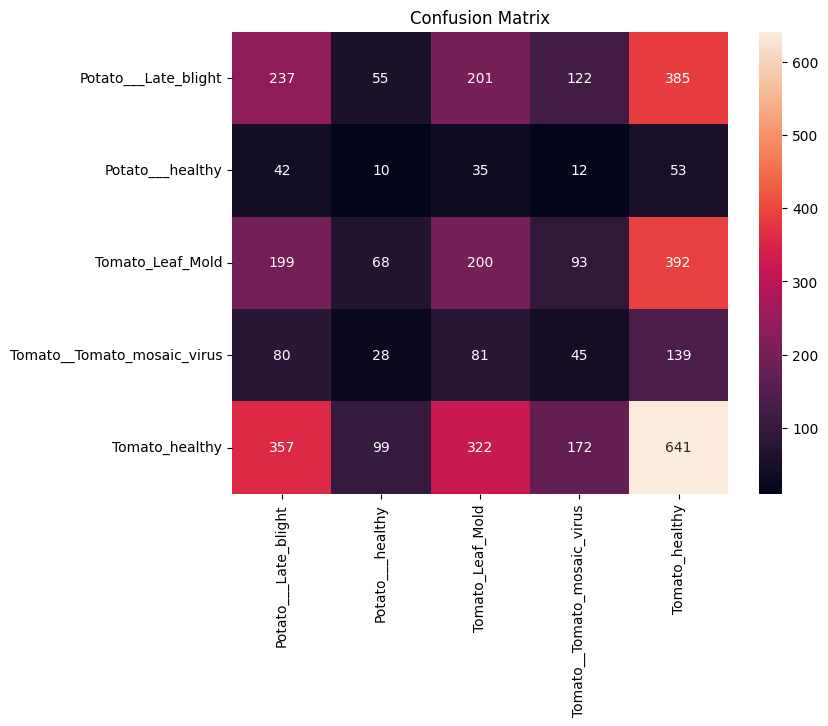

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
train_path = 'dataset/train'
test_path = 'dataset/test'
train_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, shear_range=0.2, horizontal_flip=True)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_gen.flow_from_directory(
    test_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(train_data, epochs=10, validation_data=test_data)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Model Accuracy")
plt.show()
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Get true labels and predictions
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_data.classes, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.title('Confusion Matrix')
plt.show()
